In [63]:
# 자바 설치는 인터넷 참조 - 자바는 MyBox에 있음.
#2024년 08월 05일
#자바 버전 확인:
#cmd
#java -version
#javac -version

#1.
#cmd
#pip install jpype1 : java Lib 사용 가능
#pip install konlpy

In [65]:
import pandas as pd
from konlpy.tag import Hannanum

# 텍스트 파일 경로 설정
# file_path = './blog_contents.txt'  # 현재 디렉토리에 파일이 있는 경우
file_path = "D:/git_crawling/blog_contents.txt"

# 텍스트 파일 불러오기
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# 한글 명사 추출
hannanum = Hannanum()
nouns = hannanum.nouns(content)

# 명사를 데이터 프레임으로 변환
df_word = pd.DataFrame({'word': nouns})

# 결과 확인
print(df_word.head())


           word
0  223549678286
1            기후
2             위
3           해결사
4            사이


In [66]:
# 글자 수 열 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,223549678286,12
1,기후,2
2,위,1
3,해결사,3
4,사이,2
...,...,...
7926,1명,2
7927,비,1
7928,불완전,3
7929,10명,3


In [67]:
# 두 글자 이상 단어만 남김 - 글자에 의미가 있어야 함.
df_word = df_word.query('count >=2')
df_word.sort_values('count')

,word,count
3983,문재,2
6205,참여,2
6204,동등,2
6203,과정,2
6201,영향,2
...,...,...
7405,"곳은…아프간·파푸아·중앙아메리카""",18
4074,'에코보더링ecobordering',19
2262,"보철거를위한금강낙동강영산강시민행동(금강유역환경회의,",28
4657,환경부·국가기후위기적응센터(국립환경과학원·한국환경연구원),31


In [68]:
# 단어 빈도 구하기
# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending= False)
df_word

,word,n
705,기후,85
723,기후위,70
1906,우리,54
2406,지구,49
902,대응,40
...,...,...
1184,배출권거래제,1
1187,배태,1
1188,백명식,1
1189,백지화,1


In [69]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
705,기후,85
723,기후위,70
1906,우리,54
2406,지구,49
902,대응,40
2923,환경,33
2586,출처,30
2794,필요,25
1086,문제,25
1689,쓰레기,25


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
# 가로 세로 크기 설정  + 폰트
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                    'figure.dpi'  : '120',
                    'figure.figsize' : [6.5, 6]})


<Axes: xlabel='n', ylabel='word'>

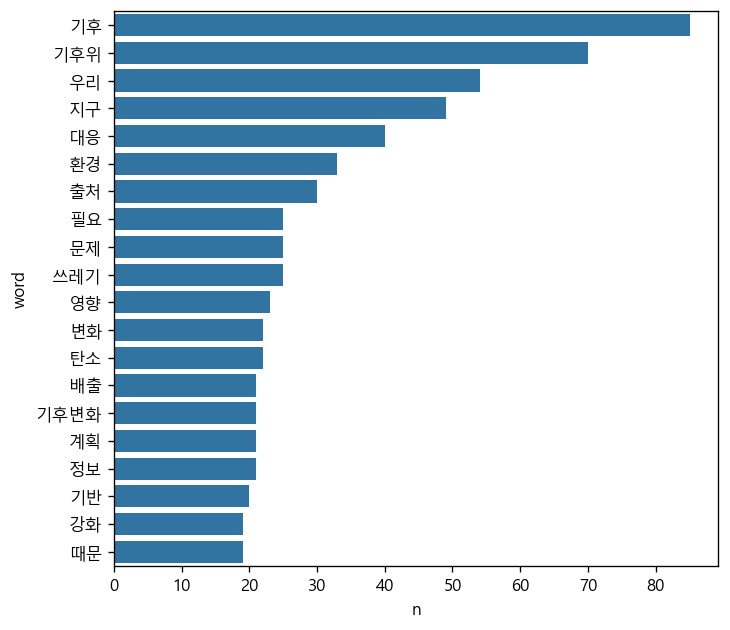

In [71]:
# 막대 그래프 만들기
sns.barplot(data = top20, y='word', x='n')

In [72]:
# pip install wordcloud - cmd에서 실시

In [73]:
font = 'malgun.ttf'

In [74]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'기후': 85,
 '기후위': 70,
 '우리': 54,
 '지구': 49,
 '대응': 40,
 '환경': 33,
 '출처': 30,
 '필요': 25,
 '문제': 25,
 '쓰레기': 25,
 '영향': 23,
 '변화': 22,
 '탄소': 22,
 '배출': 21,
 '기후변화': 21,
 '계획': 21,
 '정보': 21,
 '기반': 20,
 '강화': 19,
 '때문': 19,
 '발전': 19,
 '예측': 19,
 '게티이미지뱅크': 19,
 '제공': 18,
 '탄소중립': 18,
 '폭염': 18,
 '환경부': 17,
 '발생': 17,
 '도시': 17,
 '삼척': 17,
 '지역': 17,
 '기술': 16,
 '노력': 16,
 '생각': 16,
 '온실가스': 16,
 '상황': 16,
 '농업': 16,
 '운영': 15,
 '세계': 15,
 '시대': 15,
 '이번': 15,
 '활동': 15,
 '이상': 15,
 '사이': 15,
 '시작': 15,
 '사용': 15,
 '자연': 15,
 '활용': 15,
 '기업': 15,
 '석탄발전소': 15,
 '상승': 14,
 '실천': 14,
 '탐정': 14,
 '정부': 14,
 '우리나라': 14,
 '미래': 14,
 '지속': 14,
 '강연': 14,
 '진행': 13,
 '과정': 13,
 '에너지': 13,
 '기후위기': 13,
 '해결': 13,
 '옥상': 12,
 '공동체': 12,
 '구축': 12,
 '방법': 12,
 '불평등': 12,
 '발표': 12,
 '다양한': 12,
 '건설': 12,
 '전환': 12,
 '기존': 12,
 '이야기': 12,
 '정책': 12,
 '모두': 12,
 '국가': 12,
 '보호': 12,
 '사람': 12,
 '신설': 11,
 '성장': 11,
 '농장': 11,
 '가족': 11,
 '내용': 11,
 '중요': 11,
 '사회적': 11,
 '확보': 11,
 '방안': 11,
 '시민'

In [75]:
# Word Cloud 만들기
from wordcloud import WordCloud

In [76]:
wc = WordCloud(random_state = 1234,          # 난수 고정
                font_path = font,             # 폰트 설정
                width = 400,                  # 가로 크기
                height = 400,                 # 세로 크기
                background_color = 'white')   # 배경색

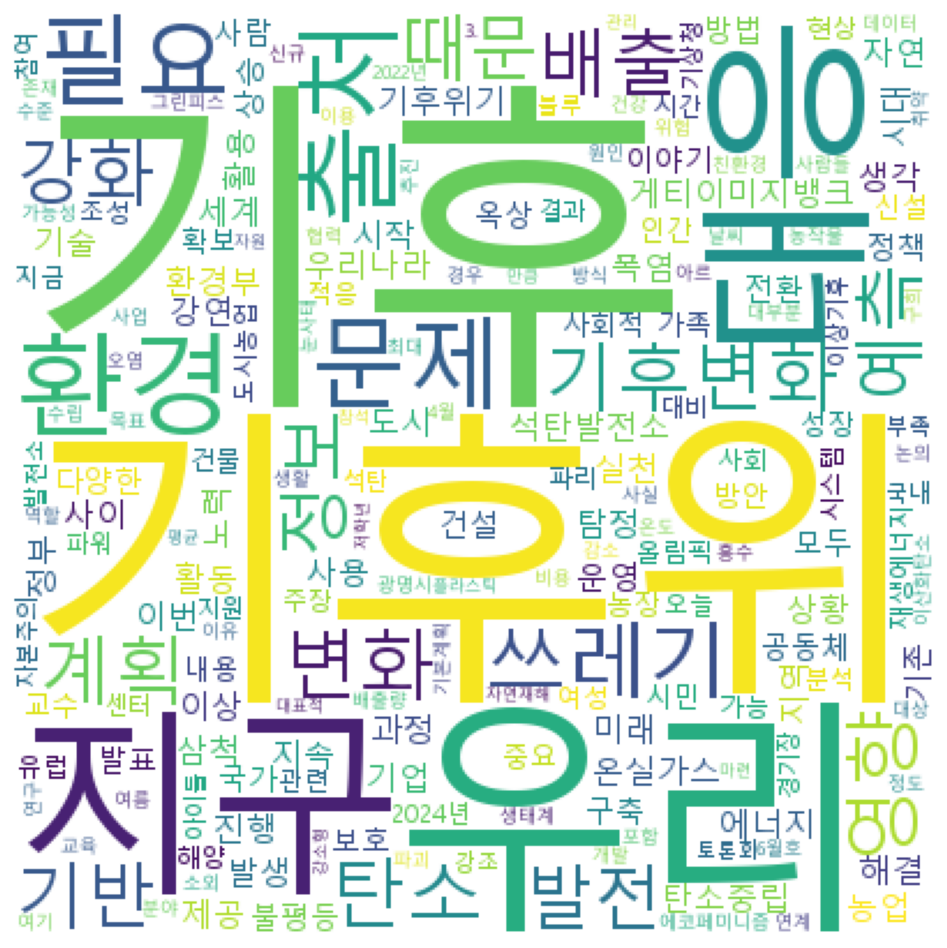

In [77]:
# 워드 클라우드(wc) 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드(wc) 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 워드 클라우드니까 x축 필요없음. 테두리 선 없애기
plt.imshow(img_wordcloud)

In [78]:
# mask 적용 
import PIL
import PIL.Image
icon = PIL.Image.open('d:/data/world.png')

In [79]:
# png 파일로 mask 생성
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

In [80]:
wc = WordCloud(random_state = 1234,          # 난수 고정
                font_path = font,             # 폰트 설정
                width = 400,                  # 가로 크기
                height = 400,                 # 세로 크기
                background_color = 'white',   # 배경색
                mask = img)

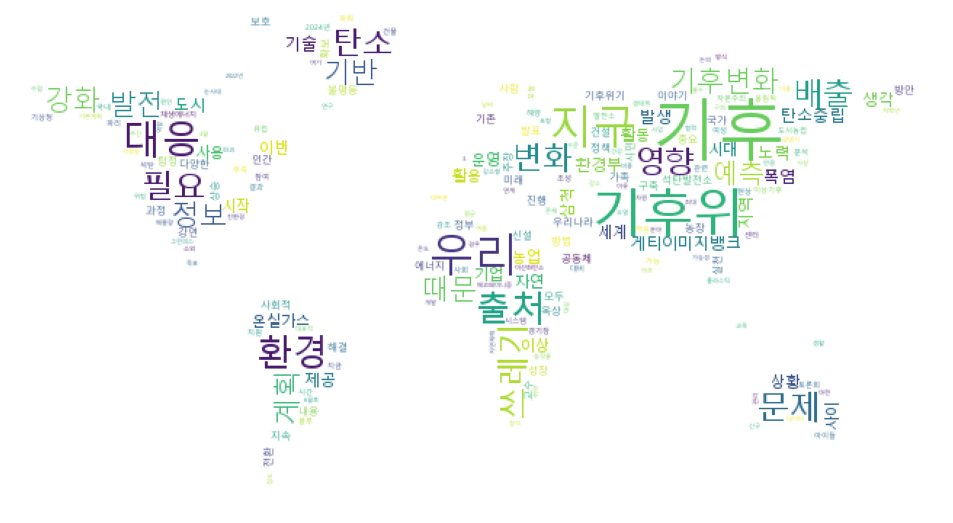

In [81]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)